In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

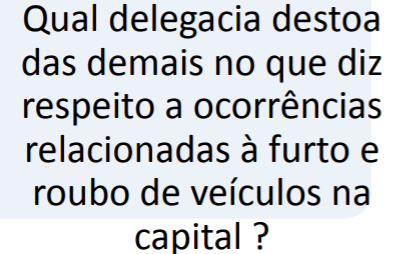
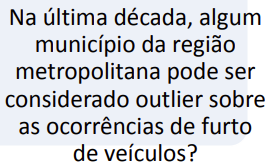

In [56]:
# Criar leitura
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep= ';', encoding= 'latin1')
#Printar DataFrame
#print(df.head(5))
#print(df.describe())
#print(df.tail(5))

In [57]:
df_furto_celular = df.groupby('cisp')['furto_celular'].sum().reset_index()
df_furto_celular = df_furto_celular.sort_values(by='furto_celular', ascending= False)
print(df_furto_celular)

     cisp  furto_celular
12     16          24879
2       5          23117
10     14          16945
8      12          16008
0       1          14968
..    ...            ...
87    104             72
77     92             63
131   157             55
114   138             52
129   155             47

[138 rows x 2 columns]


In [58]:
array_furto_celular = np.array(df_furto_celular['furto_celular'])


In [59]:
media  = np.mean(array_furto_celular)
mediana  = np.median(array_furto_celular)
q1 = np.quantile(array_furto_celular, 0.25)
q2 = np.quantile(array_furto_celular, 0.50)
q3 = np.quantile(array_furto_celular, 0.75)
distancia = ( media - mediana ) / mediana
iqr = q3 - q1
limite_superior = q3 + (1.5 * iqr)
limite_inferior = q1 - (1.5 * iqr)


In [60]:
print(f'A média é {media}')
print(f'A mediana é {mediana}')
print(f'Primeiro quartil (Q1): {q1}')
print(f'Segundo quartil (Q2), Mediana: {q2}')
print(f'Primeiro quartil (Q3): {q3}')
print(f'A distancia entre a media e a mediana é de {distancia * 100}')
print(f'O valor do limite superior é {limite_superior}')
print(f'O valor do limite inferior é {limite_inferior}')

A média é 3338.1159420289855
A mediana é 1633.5
Primeiro quartil (Q1): 449.0
Segundo quartil (Q2), Mediana: 1633.5
Primeiro quartil (Q3): 4498.25
A distancia entre a media e a mediana é de 104.35359302289473
O valor do limite superior é 10572.125
O valor do limite inferior é -5624.875


In [61]:

outlier_furto_celular = df_furto_celular.loc[df_furto_celular['furto_celular'] > limite_superior]
outlier_furto_celular

,cisp,furto_celular
12,16,24879
2,5,23117
10,14,16945
8,12,16008
0,1,14968
5,9,14159
6,10,14105
1,4,13318
14,18,12939
28,32,12206


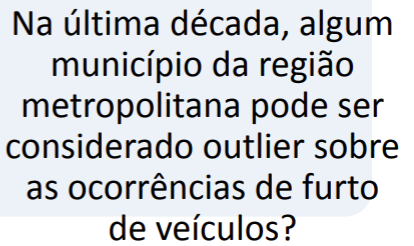

In [62]:
df =pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep = ';')

In [63]:
df_capital = df.loc[df['munic'] == 'Rio de Janeiro']
df_capital['veiculo'] = df_capital['furto_veiculos'] + df_capital['roubo_veiculo']

C:\Users\stephany.andrade\AppData\Local\Temp\ipykernel_25992\414495733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capital['veiculo'] = df_capital['furto_veiculos'] + df_capital['roubo_veiculo']


In [64]:
df_veiculo_capital = df_capital.groupby('cisp')['veiculo'].sum().reset_index()
df_veiculo_capital = df_veiculo_capital.sort_values(by='veiculo', ascending= False)
df_veiculo_capital.head(5)


,cisp,veiculo
23,27,39024
30,34,36897
31,35,33436
35,39,32500
34,38,25999


In [65]:
array_veiculo_capital = np.array(df_veiculo_capital['veiculo'])

In [66]:
media  = np.mean(array_veiculo_capital)
mediana  = np.median(array_veiculo_capital)
q1 = np.quantile(array_veiculo_capital, 0.25)
q2 = np.quantile(array_veiculo_capital, 0.50)
q3 = np.quantile(array_veiculo_capital, 0.75)
distancia = ( media - mediana ) / mediana
iqr = q3 - q1
limite_superior = q3 + (1.5 * iqr)
limite_inferior = q1 - (1.5 * iqr)



In [67]:
print(f'A média é {media}')
print(f'A mediana é {mediana}')
print(f'Primeiro quartil (Q1): {q1}')
print(f'Segundo quartil (Q2), Mediana: {q2}')
print(f'Primeiro quartil (Q3): {q3}')
print(f'A distancia entre a media e a mediana é de {distancia * 100}')
print(f'O valor do limite superior é {limite_superior}')
print(f'O valor do limite inferior é {limite_inferior}')

A média é 13949.333333333334
A mediana é 12701.0
Primeiro quartil (Q1): 5015.25
Segundo quartil (Q2), Mediana: 12701.0
Primeiro quartil (Q3): 18068.75
A distancia entre a media e a mediana é de 9.8286224181823
O valor do limite superior é 37649.0
O valor do limite inferior é -14565.0


In [68]:
#resultado exercicio 1

outlier_furto_celular = df_veiculo_capital.loc[df_veiculo_capital['veiculo'] > limite_superior]
outlier_furto_celular

,cisp,veiculo
23,27,39024


In [69]:
outlier_furto_celular.to_csv('outlier_furto_celular.csv', sep= ';', index=False)